In [1]:
%load_ext autoreload
%autoreload 2

import os,sys,warnings
import h5py, pandas
import numpy as np
np.seterr(invalid=['ignore','warn'][0])
np.set_printoptions(legacy='1.25')
import math,cmath,pickle
from matplotlib.backends.backend_pdf import PdfPages
from scipy.optimize import curve_fit,fsolve
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('default')
mpl.rcParams['figure.facecolor'] = 'white'
mpl.rcParams['figure.titlesize'] = 20
mpl.rcParams['figure.figsize'] = [6.4*1.2,4.8*1.2]
mpl.rcParams['axes.labelsize'] = 30
mpl.rcParams['axes.titlesize'] = 30
mpl.rcParams['lines.marker'] = 's'
mpl.rcParams['lines.linestyle'] = ''
mpl.rcParams['lines.markersize'] = 4
mpl.rcParams['errorbar.capsize'] = 6
mpl.rcParams['xtick.labelsize'] = mpl.rcParams['ytick.labelsize'] = 22
mpl.rcParams['xtick.major.size'] = mpl.rcParams['ytick.major.size'] = 10
mpl.rcParams['xtick.top']=mpl.rcParams['ytick.right']=True
mpl.rcParams['xtick.direction']=mpl.rcParams['ytick.direction']='in'
mpl.rcParams['legend.fontsize'] = 24
plt.rcParams["font.family"] = "serif"
plt.rcParams["mathtext.fontset"] = "dejavuserif"

# mpl.rcParams.update({"axes.grid" : True})
import util as yu
yu.flag_fast=False

enss=['a24','a','b']
ens2full={'a24':'cA211.53.24','a':'cA2.09.48','b':'B64','c':'C80','d':'D96'}
ens2label={'a24':'A24','a':'A48','b':'B64','c':'C80','d':'D96'}
ens2a={'a24':0.0908,'a':0.0938,'b':0.07957,'c':0.06821,'d':0.05692} # fm
ens2N={'a24':24,'a':48,'b':64,'c':80,'d':96}
ens2N_T={'a24':24*2,'a':48*2,'b':64*2,'c':80*2,'d':96*2}

# ens2mN={'a':931}
# ens2mpiC={'a':131}
# ens2mpi0={'a':111}

ens2amu={'a24':0.0053,'a':0.0009,'b':0.00072}
ens2amus={'b':0.0186}
ens2amuc={'b':0.249}
ens2ZP={'a24':(0.4670,0.0046),'a':(0.500,0.030)}

hbarc = 1/197.3
ens2aInv={ens:1/(ens2a[ens]*hbarc) for ens in enss} # MeV

def fsolve2(func,x0):
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        res=fsolve(func, x0)[0]
    return res if res!=x0 else np.NaN

ens='b'
ens2a[ens]*hbarc*1000

0.40329447541814495

In [2]:
tfs=range(3,26+1)
flas=['j+','js','jc']
data={}
path='/p/project/ngff/li47/code/projectData/02_discNJN_1D/cB211.072.64/data_earlytest/test_avg.h5'
with h5py.File(path) as f:
    data['N0']=yu.jackknife(f['N_mom0'])
    data['N1']=yu.jackknife(f['N_mom1'])
    
    data['P44']={}
    data['P4i']={}
    for fla in flas:
        data['P44'][fla]={}
        data['P4i'][fla]={}
        for tf in tfs:
            data['P44'][fla][tf]=yu.jackknife(f[f'{fla}/P44(G0,0,0)/{tf}'])
            data['P4i'][fla][tf]=yu.jackknife((f[f'{fla}/P4i(G0,pi,pi)/{tf}'][:]+f[f'{fla}/P4i(G0,pi,pi)_bw/{tf}'])/2)

In [ ]:
# tfs=[6]
# flas=['j+']
# data={}
# path='/p/project/ngff/li47/code/projectData/02_discNJN_1D/cB211.072.64/data_earlytest/test.h5'
# with h5py.File(path) as f:
#     data['N0']=yu.jackknife(f['N_mom0'])
#     data['N1']=yu.jackknife(f['N_mom1'])
    
#     data['P44']={}
#     data['P4i']={}
#     data['P4i_bw']={}
#     for fla in flas:
#         data['P44'][fla]={}
#         data['P4i'][fla]={}
#         data['P4i_bw'][fla]={}
#         for tf in tfs:
#             data['P4i'][fla][tf]={}
#             data['P4i_bw'][fla][tf]={}
#             for name in ['txp','txn','typ','tyn','tzp','tzn']:
#                 data['P4i'][fla][tf][name]=yu.jackknife(f[f'{fla}/P4i(G0,pi,pi)/{name}/{tf}'])
#                 data['P4i_bw'][fla][tf][name]=yu.jackknife(f[f'{fla}/P4i(G0,pi,pi)_bw/{name}/{tf}'])

In [19]:
# xunit=ens2a[ens]; yunit=1
# fix, axs = yu.getFigAxs(1,1,Lrow=6,Lcol=12)
# tfs_plt=[6]
# t_cut=2

# cN1=np.real(data['N1'])

# j='j+'
# ax=axs[0,0]
# # ax.set_ylim([0,0.2])
# colors=['b','orange','g','r','purple','brown','magenta','gold','cyan']
# for i_tf,tf in enumerate(tfs_plt):
#     c3pt=np.real(data['P4i'][j][tf]['txn']/(1j*2*np.pi/ens2N[ens]))
#     # c3pt=np.real(data['P4i'][j][tf]/(1j))
#     ratio=c3pt/cN1[:,tf:tf+1]
    
#     mean,err=yu.jackme(ratio)
#     tcs=np.arange(t_cut,tf-t_cut+1)
#     plt_x=(tcs-tf/2+0.1*(tf-6)+ (0.5 if tf%2!=0 else 0))*xunit; plt_y=mean[t_cut:tf+1-t_cut]*yunit; plt_yerr=err[t_cut:tf+1-t_cut]*yunit
#     ax.errorbar(plt_x,plt_y,plt_yerr,color=colors[i_tf])  

In [7]:
xunit=ens2a[ens]; yunit=ens2aInv[ens]/1000
fix, axs = yu.getFigAxs(1,1,Lrow=6,Lcol=16)
ax=axs[0,0]
ax.set_ylim([0.88,1.08])
ax.set_ylim([0.5,1.9])

mN_exp=0.938; mp_exp,mn_exp=(0.93827,0.93957)
ax.axhline(y=mN_exp,color='black',linestyle = '--', marker='')

c2pt_jk=np.real(data['N0'])

func=lambda C2pt: np.log(C2pt/np.roll(C2pt,-1,axis=0))
mEff_jk=yu.jackmap(func,c2pt_jk)
(mEff_mean,mEff_err)=yu.jackme(mEff_jk)
tmin=1; tmax=32+1
plt_x=(np.arange(tmin,tmax)+1)*xunit; plt_y=mEff_mean[tmin:tmax]*yunit; plt_err=mEff_err[tmin:tmax]*yunit
ax.errorbar(plt_x,plt_y,plt_err,color='r',fmt='s')

<ErrorbarContainer object of 3 artists>

64


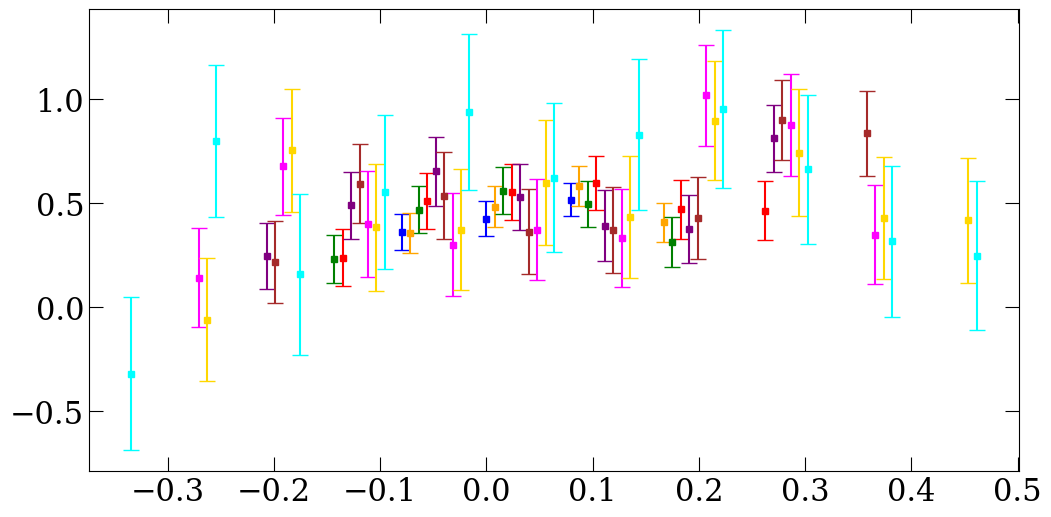

In [ ]:
ens='b'
xunit=ens2a[ens]; yunit=1
fix, axs = yu.getFigAxs(1,1,Lrow=6,Lcol=12)
tfs_plt=range(6,14+1,1)
t_cut=2

cN1=np.real(data['N1'])

j='j+'
ax=axs[0,0]
# ax.set_ylim([0,0.2])
colors=['b','orange','g','r','purple','brown','magenta','gold','cyan']
for i_tf,tf in enumerate(tfs_plt):
    c3pt=np.real(data['P4i'][j][tf]/(1j*2*np.pi/ens2N[ens]))
    # c3pt=np.real(data['P4i'][j][tf]/(1j))
    ratio=c3pt/cN1[:,tf:tf+1]
    
    mean,err=yu.jackme(ratio)
    tcs=np.arange(t_cut,tf-t_cut+1)
    plt_x=(tcs-tf/2+0.1*(tf-6)+ (0.5 if tf%2!=0 else 0))*xunit; plt_y=mean[t_cut:tf+1-t_cut]*yunit; plt_yerr=err[t_cut:tf+1-t_cut]*yunit
    ax.errorbar(plt_x,plt_y,plt_yerr,color=colors[i_tf])  